# Clean WhoPaysWriters Data

A sloppy, nevertheless effective way to clean data from [WhoPaysWriters.com](http://whopayswriters.com/#/results)

[allData_raw.csv](allData_raw.csv) is created by [scrapeWPW.py](scrapeWPW.py)

A few of the decisions that I've made:
* I'm replacing most `other` entries with NaNs.
* I'm dropping everything with fewer than 100 words
* I'm dropping all `fiction` and `poetry` entries
* I'm dropping entries for 2019
* Potential spam, unreasonable outliers are cut. They are addressed on a case-by-case basis

In [159]:
import pandas as pd
import numpy as np
%matplotlib inline
df = pd.read_csv('allData_raw.csv')
df.sample(50)

,comment,contract,dollar,flatRate,levelOfReporting,paidYet,paymentDifficulty,platform,publication,relationship,rights,storyType,wordCount,year
485,"""""But I had to ask for it. I'd written for the...",Contract:,$0.04,False,NaN,NaN,ng-hide,NaN,Xojane,NaN,Rights:,feature,~1250,2012
2511,NaN,Contract: No,$0.21,False,Medium reporting,Paid in 1 month,svg-1,Platform: digital,Gizmodo,Cold pitch (no pre-existing relationship),Rights: First Serial Rights,feature,2000,2018
2195,NaN,Contract:,$0.20,False,NaN,Paid in 15 days,svg-1,Platform: digital,Model View Culture,NaN,Rights: First Serial Rights,NaN,1000-word,2016
2223,NaN,Contract: No,$0.47,False,Little to no reporting,NaN,ng-hide,Platform: digital,Al Jazeera America,Cold pitch (no pre-existing relationship),Rights: Other / I don't know,"opinion, editorial, column or essay",~750,2014
1735,NaN,Contract: Yes,$0.75,False,Medium reporting,Paid in 3 months,svg-2,Platform: digital,Variety,Ongoing/pre-existing relationship with editor ...,Rights: All rights,"criticism, review, or arts/entertainment coverage",600,2017
2188,NaN,Contract: Yes,$0.07,False,Little to no reporting,NaN,ng-hide,Platform: digital,Medium,Solicited pitch (editor asked you to pitch),Rights: First Serial Rights,"opinion, editorial, column or essay",~1500,2014
2898,NaN,"Contract: Verbal or ""handshake"" agreement",$0.05,False,Little to no reporting,NaN,ng-hide,Platform: digital,Fiftyisthenewfifty.com,Other,Rights: First Serial Rights,fob,~750,2015
1088,"""Never discussed money, was given my going rat...",Contract: No,$0.04,False,Heavy/Investigative reporting,NaN,ng-hide,Platform: digital,Slate,Submission/spec (piece was written prior and t...,Rights: First Serial Rights,fob,~5000,2014
1784,NaN,Contract: No,$0.08,False,Little to no reporting,Haven't gotten it yet (as of this reporting),svg-5,Platform: digital,Vdrome,Assignment (editor came to you),Rights: All rights,profile or interview,800,2018
740,NaN,Contract: No,$0.08,False,Little to no reporting,Paid in 15 days,svg-1,Platform: digital,The Penny Hoarder,Cold pitch (no pre-existing relationship),Rights: Other / I don't know,blog post,961,2016


### Flat rate

In [160]:
df.flatRate.unique()

array([False, nan, True], dtype=object)

### Contract

In [161]:
df.contract.unique()

array(['Contract: Yes', 'Contract: ',
       'Contract: Verbal or "handshake" agreement', 'Contract: No'],
      dtype=object)

In [162]:
# Let's stardardize these better
df['contract'].replace('Contract: ', np.nan, inplace=True)
df['contract'].replace('Contract: Yes', 'Yes', inplace=True)
df['contract'].replace('Contract: No', 'No', inplace=True)
df['contract'].replace('Contract: Verbal or "handshake" agreement', 'Verbal', inplace=True)
df.contract.unique()


array(['Yes', nan, 'Verbal', 'No'], dtype=object)

### Level of reporting

In [163]:
df.levelOfReporting.unique()

array(['Little to no reporting', nan, 'Medium reporting',
       'Ongoing/pre-existing relationship with editor or publication',
       'Heavy/Investigative reporting', 'Other',
       'Submission/spec (piece was written prior and then submitted for publication)',
       'Cold pitch (no pre-existing relationship)',
       'Assignment (editor came to you)',
       'Solicited pitch (editor asked you to pitch)'], dtype=object)

In [164]:
# mixup with relationship info
incorrect = [
    'Ongoing/pre-existing relationship with editor or publication', 
    'Cold pitch (no pre-existing relationship)', 
    'Assignment (editor came to you)', 
    'Solicited pitch (editor asked you to pitch)',
    'Other',
    'Submission/spec (piece was written prior and then submitted for publication)'
]

for i, r in df.iterrows():
    if r['levelOfReporting'] in incorrect:
        swap = r['levelOfReporting']
        df.at[i, 'levelOfReporting'] = np.nan
        df.at[i, 'relationship'] = swap

# now shorten
translate = {
    'Little to no reporting': 'Light',
    'Medium reporting': 'Medium',
    'Heavy/Investigative reporting': 'Heavy',
}


for i, r in df.iterrows():
    if r['levelOfReporting'] in translate:
        df.at[i, 'levelOfReporting'] = translate[r['levelOfReporting']]
        
df.levelOfReporting.unique()

array(['Light', nan, 'Medium', 'Heavy'], dtype=object)

### Relationship with editor

In [165]:
df.relationship.unique()

array(['Cold pitch (no pre-existing relationship)', nan,
       'Ongoing/pre-existing relationship with editor or publication',
       'Assignment (editor came to you)',
       'Referral (you had a connection who connected you to the editor)',
       'Solicited pitch (editor asked you to pitch)', 'Other',
       'Submission/spec (piece was written prior and then submitted for publication)',
       'edito', 'Calls page', 'Reprint request', 'See below'],
      dtype=object)

In [166]:
translate = {
    'Cold pitch (no pre-existing relationship)': 'Cold Pitch',
    'Ongoing/pre-existing relationship with editor or publication': 'Ongoing',
    'Assignment (editor came to you)': 'Assignment',
    'Referral (you had a connection who connected you to the editor)': 'Referral',
    'Solicited pitch (editor asked you to pitch)': 'Solicited Pitch',
    'Submission/spec (piece was written prior and then submitted for publication)': 'Spec',
    # below are items that are one-offs / too small to consider
    'Calls page': np.nan, 
    'Reprint request': np.nan,
    'Other': np.nan,
    'edito': np.nan,
    'See below': np.nan,
}

for i, r in df.iterrows():
    if r['relationship'] in translate:
        df.at[i, 'relationship'] = translate[r['relationship']]

df.relationship.unique()

array(['Cold Pitch', nan, 'Ongoing', 'Assignment', 'Referral',
       'Solicited Pitch', 'Spec'], dtype=object)

### Amount of time to be paid

In [167]:
df.paidYet.unique()

array(['Paid in 6 weeks ', 'Paid in 2 months ', 'Paid in 1 month ',
       "Haven't gotten it yet (as of this reporting) ",
       'Longer than 3 months ', 'Paid in 3 months ', nan, 'N/A ',
       'Paid in 15 days '], dtype=object)

In [168]:
translate = {
    'N/A': np.nan,
    'Paid in 15 days': 15,
    'Paid in 1 month': 30,
    'Paid in 6 weeks': 42,
    'Paid in 2 months': 60,
    'Paid in 3 months': 90,
    'Longer than 3 months': '>90',
    "Haven't gotten it yet (as of this reporting)": 'Not Yet'
}

for i, r in df.iterrows():
    if r['paidYet'] is not np.nan:
        df.at[i, 'paidYet'] = translate[r['paidYet'].strip()]

df = df.rename(index=str, columns={'paidYet': 'daysToBePaid'})
df.daysToBePaid.unique()

array([42, 60, 30, 'Not Yet', '>90', 90, nan, 15], dtype=object)

### Payment difficulty

In [169]:
df.paymentDifficulty.unique()

array(['svg-2', 'svg-4', 'svg-3', 'ng-hide', 'svg-1', 'svg-5',
       'svg-false'], dtype=object)

In [170]:
# 1 is great, 5 is bad
df.paymentDifficulty.replace('svg-1', 1, inplace=True)
df.paymentDifficulty.replace('svg-2', 2, inplace=True)
df.paymentDifficulty.replace('svg-3', 3, inplace=True)
df.paymentDifficulty.replace('svg-4', 4, inplace=True)
df.paymentDifficulty.replace('svg-5', 5, inplace=True)
df.paymentDifficulty.replace('svg-false', np.nan, inplace=True)
df.paymentDifficulty.replace('ng-hide', np.nan, inplace=True)
df.paymentDifficulty.unique()

array([ 2.,  4.,  3., nan,  1.,  5.])

### Rights

In [171]:
df.rights.unique()

array(['Rights: All rights', "Rights: Other / I don't know",
       'Rights: First Serial Rights', 'Rights: ',
       'Rights: Secondary Rights/Reprint'], dtype=object)

In [172]:
df.rights.replace('Rights: All rights', 'All', inplace=True)
df.rights.replace('Rights: First Serial Rights', 'First', inplace=True)
df.rights.replace('Rights: Secondary Rights/Reprint', 'Secondary', inplace=True)
df.rights.replace("Rights: Other / I don't know", 'Unknown', inplace=True)
df.rights.replace('Rights: ', np.nan, inplace=True)
df.rights.unique()

array(['All', 'Unknown', 'First', nan, 'Secondary'], dtype=object)

### Platform

In [173]:
df.platform.unique()

array(['Platform: digital', 'Platform: print', nan, 'Platform: other'],
      dtype=object)

In [174]:
df.platform.replace('Platform: digital', 'Digital', inplace=True)
df.platform.replace('Platform: print', 'Print', inplace=True)
df.platform.replace('Platform: other', np.nan, inplace=True)
df.platform.unique()

array(['Digital', 'Print', nan], dtype=object)

### Word count

In [175]:
df.wordCount.unique()

array(['500', '950-word', '800', '817', '1000', '1300', '1200',
       '500-word', '600', '400', '~750', '2500', '5000', '4000-word',
       '3500', '2500-word', '1400', '1500-word', '1500', '~1500', '1050',
       '1600', '~3000', '2000', '750', '1047', '717', '2300', '990',
       '~5000', '4500', '4973', '2200', '750-word', '1333', '1318',
       '~375', '1800', '593', '950', '3000', '700', '300', '1020', '1350',
       '400.0', nan, '3200', '2314', ' feature', '1566', '4000',
       '2000-word', '350', '2900', '700-word', '1000-word', '6000',
       '2400', '1234', '6500-word', '~4-word', '1850', '1200-word',
       '800-word', '900', '300-word', '1750', '1450.0', '250', '1125',
       '600-word', '599',
       ' criticism, review, or arts/entertainment converage', '1100',
       '1700-word', '6500', ' news story', '~125', '1250', '1400-word',
       '760-word', '1700', '1100-word', '~500', ' blog post', '732',
       '1000.0', '1300.0', '3000-word', '719', '1400.0', '200', '730',


In [176]:
# We had errors / unusual titles load into wordCount.
# find all non-numeric entries
num = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
df_test = df.replace(np.nan, 'NAN')
df_r = df_test[~df_test['wordCount'].str.contains('|'.join(num))]
df_r['wordCount'].unique()

array(['NAN', ' feature',
       ' criticism, review, or arts/entertainment converage',
       ' news story', ' blog post',
       ' opinion, editorial, column or essay', ' fob',
       ' profile or interview', ' other', ' fiction', ' poetry'],
      dtype=object)

In [177]:
# These mistakes are all storyTypes
mistakes = [' feature', ' criticism, review, or arts/entertainment converage',
       ' news story', ' blog post', ' opinion, editorial, column or essay', ' fob',
       ' profile or interview', ' other', ' fiction', ' poetry']

for i, r in df.iterrows():
    if not isinstance(r['wordCount'], float):
        if 'word' in r['wordCount']:
            df.at[i, 'wordCount'] = df.at[i, 'wordCount'].strip('word')
        if '-' in r['wordCount']:
            df.at[i, 'wordCount'] = df.at[i, 'wordCount'].strip('-')
        if '~' in r['wordCount']:
            df.at[i, 'wordCount'] = df.at[i, 'wordCount'].strip('~')
        if r['wordCount'] in mistakes:
            df.at[i, 'storyType'] = r['wordCount'].strip()
            df.at[i, 'wordCount'] = np.nan
df.wordCount = df.wordCount.astype(float)
df.wordCount.head()

0     500.0
1     950.0
2     800.0
3     817.0
4    1000.0
Name: wordCount, dtype: float64

### Story type

In [178]:
df.loc[df['storyType'] == 'criticism, review, or arts/entertainment converage', 'storyType'] = \
    'criticism, review, or arts/entertainment coverage'
df.storyType.unique()

array(['news story', nan, 'opinion, editorial, column or essay',
       'feature', 'blog post', 'other',
       'criticism, review, or arts/entertainment coverage',
       'profile or interview', 'fob', 'fiction', 'poetry'], dtype=object)

In [179]:
translate = {
    'news story': 'News',
    'opinion, editorial, column or essay': 'Opinion',
    'feature': 'Feature',
    'blog post': 'Blog',
    'other': np.nan,
    'criticism, review, or arts/entertainment coverage': 'Criticism',
    'profile or interview': 'Profile',
    'fob': 'FoB'
} # dropping fiction and poetry rows later

for i, r in df.iterrows():
    if r['storyType'] in translate:
        df.at[i, 'storyType'] = translate[r['storyType']]
df.storyType.unique()

array(['News', nan, 'Opinion', 'Feature', 'Blog', 'Criticism', 'Profile',
       'FoB', 'fiction', 'poetry'], dtype=object)

### Dollar per word (or per article if flat rate)

In [180]:
df.dollar.sample(5)

2653    $0.03
309     $0.05
1221    $0.13
2996    $0.00
3230    $0.13
Name: dollar, dtype: object

In [181]:
for i, r in df.iterrows():
    if not (r.dollar is None or isinstance(r.dollar, float)):
        df.at[i, 'dollar'] = df.at[i, 'dollar'].strip('$')
df.dollar = df.dollar.astype(float)
df.dollar.sample(5)

3313    0.55
2812    0.50
1160    0.40
525     0.17
2463    0.40
Name: dollar, dtype: float64

### Insert `totalPaid` and `wordRate` column. 
Drop the vague `dollar` column

In [182]:
for i, r in df.iterrows():
    if r.flatRate:
        df.at[i, 'totalPaid'] = r['dollar']
        df.at[i, 'wordRate'] = r['dollar'] / r['wordCount']
    else:
        df.at[i, 'totalPaid'] = r['wordCount']*r['dollar']
        df.at[i, 'wordRate'] = r['dollar']

df = df.drop('dollar', axis=1)

***
# Search for outliers and potential errors

### totalPaid

count    3.368000e+03
mean     2.705572e+03
std      1.350887e+05
min      0.000000e+00
25%      7.585000e+01
50%      2.000000e+02
75%      3.960000e+02
max      7.840000e+06
Name: totalPaid, dtype: float64

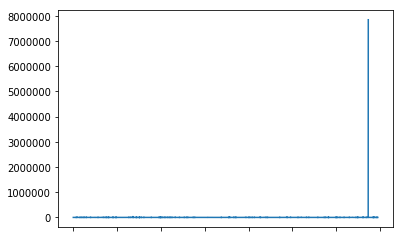

In [183]:
df['totalPaid'].plot()
df['totalPaid'].describe()

In [184]:
df[df['totalPaid'] > 100000]

,comment,contract,flatRate,levelOfReporting,daysToBePaid,paymentDifficulty,platform,publication,relationship,rights,storyType,wordCount,year,totalPaid,wordRate
3367,NaN,Yes,False,Heavy,60,4.0,Print,Red Bulletin,Solicited Pitch,All,Feature,2800.0,2016,7840000.0,2800.0


count     3368.000000
mean       378.612374
std        919.901719
min          0.000000
25%         75.850000
50%        200.000000
75%        396.000000
max      33600.000000
Name: totalPaid, dtype: float64

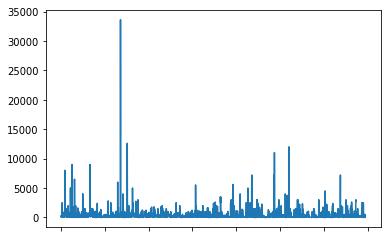

In [185]:
# I'm going to make the assumption that it was a flatRate
# I'm hard-coding this in. Could mistake future outliers!
df.loc[df['totalPaid'] > 100000, 'flatRate'] = True
df.loc[df['totalPaid'] > 100000, 'wordRate'] = 1
df.loc[df['totalPaid'] > 100000, 'totalPaid'] = 2800
df['totalPaid'].plot()
df['totalPaid'].describe()

### wordRate

count    3192.000000
mean        0.380072
std         4.443633
min         0.000000
25%         0.070000
50%         0.190000
75%         0.350000
max       250.000000
Name: wordRate, dtype: float64

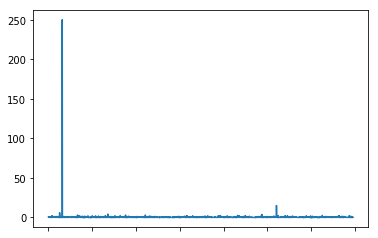

In [186]:
df['wordRate'].plot()
df['wordRate'].describe()
# Wow. That's a lot of money.

In [187]:
df[(df['wordRate'] > 20)]

,comment,contract,flatRate,levelOfReporting,daysToBePaid,paymentDifficulty,platform,publication,relationship,rights,storyType,wordCount,year,totalPaid,wordRate
158,NaN,NaN,False,NaN,NaN,NaN,NaN,Global Post,NaN,NaN,NaN,4.0,2013,1000.0,250.0


count    3191.000000
mean        0.301846
std         0.461516
min         0.000000
25%         0.070000
50%         0.190000
75%         0.350000
max        15.000000
Name: wordRate, dtype: float64

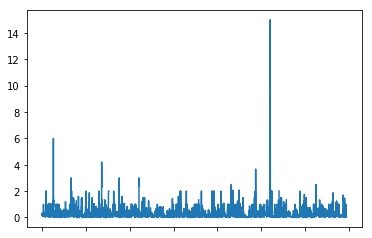

In [188]:
# That's probably not right. Let's assume that is spam.
df = df[(df['wordRate'] <= 20) | (df['wordRate'].isnull())]

df['wordRate'].plot()
df['wordRate'].describe()

In [189]:
# Just check that last jump
df[df['wordRate'] > 5]
# Yeah that looks alright

,comment,contract,flatRate,levelOfReporting,daysToBePaid,paymentDifficulty,platform,publication,relationship,rights,storyType,wordCount,year,totalPaid,wordRate
128,NaN,NaN,False,NaN,42,1.0,Print,Science Magazine,NaN,Unknown,NaN,1500.0,2017,9000.0,6.0
2603,NaN,Yes,False,Medium,15,1.0,Digital,Curve Magazine,Ongoing,First,Profile,800.0,2017,12000.0,15.0


### wordCount

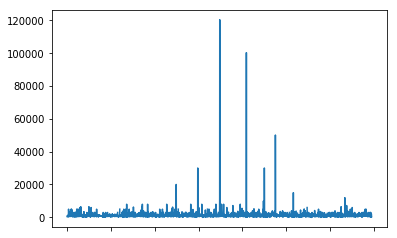

In [190]:
df['wordCount'].plot()
# Hm that's a lot of words.

In [191]:
df[df['wordCount'] > 15000]

,comment,contract,flatRate,levelOfReporting,daysToBePaid,paymentDifficulty,platform,publication,relationship,rights,storyType,wordCount,year,totalPaid,wordRate
1245,NaN,NaN,False,NaN,NaN,2.0,Digital,Atlanta Blackstar,NaN,Unknown,NaN,20000.0,2018,400.0,0.02
1491,"""Pays two months after publication.""",Yes,False,Heavy,NaN,NaN,Print,The Believer,Solicited Pitch,All,Profile,30000.0,2013,300.0,0.01
1742,NaN,Yes,False,Light,Not Yet,5.0,Digital,Kpopstarz,Ongoing,All,NaN,120000.0,2017,2400.0,0.02
2046,"""The commission was for a guidebook published ...",Yes,False,Light,Not Yet,5.0,Print,Highend Media / Gatehouse Publishing,NaN,All,NaN,100000.0,2018,4000.0,0.04
2251,NaN,Yes,False,Light,NaN,NaN,Digital,The American Reader,Cold Pitch,First,fiction,30000.0,2014,900.0,0.03
2377,"""Books tend to have ongoing royalties: 6% afte...",Yes,False,Heavy,NaN,NaN,Print,Oxford University Press,Cold Pitch,All,NaN,50000.0,2013,1000.0,0.02


In [192]:
# Yikes. This isn't straightforward
for i in df[df['wordCount'] > 15000]['comment']:
    print(i, end='\n\n')
df.shape[0]

nan

"Pays two months after publication."

nan

"The commission was for a guidebook published by Gatehouse, which was bought by HighEnd Media in December 2017. HighEnd's MD is non-responsive to emails, except to say there is current a "funding freeze" and he has been "instructed not to expect any additional funds until March." HighEnd's other publications include Billionaire Magazine and Crown Magazine."

nan

"Books tend to have ongoing royalties: 6% after the first 600 paperback copies (0% for the first 600). The initial print run was: 600 copies. (Luckily mine sold out and they did a second printing.) The book was based on my dissertation. I now have a student with a dissertation-based book ms accepted at Oxford University Press who was told they no longer pay *any* royalties for "books based on dissertations". 

Academics also typically get paid zero for chapters they write in edited volumes, for encyclopedia entries, and other smaller pieces (at least in the humanities). I'd love 

3474

In [193]:
# Let's decide to drop books.
# The American Reader and The Believer have lengthy reports. Let's believe those.
# I can find few Atlanta Black Star and Kpopstarz stories anywhere near these estimates. 
#     I'm dropping these submissions

keepIf = (df['wordCount'] < 15000) | df['wordCount'].isnull() | df['publication'].isin(['The American Reader', 'The Believer'])
df = df[keepIf]
df[df['wordCount'] > 15000]
df.shape[0]

3469

In [194]:
# drop all submissions with especially low word-counts
df = df[(df['wordCount'] >= 100) | df['wordCount'].isnull()]

### Remove 2019, poetry and fiction

In [195]:
df = df[df['year'] != 2019]
df = df[~df['storyType'].isin(['poetry', 'fiction'])]

***
# Check quality, reorder columns, and export

In [196]:
df.sample(50)

,comment,contract,flatRate,levelOfReporting,daysToBePaid,paymentDifficulty,platform,publication,relationship,rights,storyType,wordCount,year,totalPaid,wordRate
699,NaN,No,False,Medium,NaN,NaN,Digital,Dazed,Spec,All,Opinion,1500.0,2015,225.00,0.15
1416,NaN,NaN,True,NaN,NaN,NaN,NaN,Salon,NaN,NaN,NaN,NaN,2012,150.00,NaN
1098,"""“Asked for more after very popular post. Inst...",NaN,True,NaN,NaN,NaN,Digital,Slate,NaN,NaN,Blog,NaN,2013,150.00,NaN
133,NaN,NaN,False,NaN,Not Yet,5.0,Digital,Something Else! Reviews,NaN,Secondary,NaN,1500.0,2018,555.00,0.37
592,NaN,No,False,Light,Not Yet,3.0,Digital,Realsimple.com,Ongoing,Unknown,NaN,1000.0,2018,100.00,0.10
2198,"""Online essay to accompany their print magazin...",Yes,False,Light,NaN,NaN,Digital,Time (ideas.time.com),Assignment,First,Opinion,750.0,2013,150.00,0.20
186,NaN,NaN,True,NaN,NaN,NaN,NaN,Waging Nonviolence,NaN,NaN,NaN,NaN,2012,75.00,NaN
1354,NaN,NaN,False,NaN,60,2.0,Digital,Backchannel,NaN,First,NaN,3000.0,2017,180.00,0.06
2462,"""great edits & timely payment. """,NaN,False,Medium,NaN,NaN,Digital,Adbusters,NaN,NaN,Feature,3000.0,2014,1500.00,0.50
1768,NaN,No,False,Medium,30,1.0,Digital,Next City,Cold Pitch,Unknown,Feature,1100.0,2017,220.00,0.20


In [197]:
cols = ['publication', 'year', # meta
    'wordRate', 'wordCount', 'flatRate', 'totalPaid', # payment
    'paymentDifficulty', 'daysToBePaid', # payment red tape 
    'storyType', 'levelOfReporting', # effort
    'relationship', 'rights', 'platform', 'contract', # business
    'comment'] #other
df = df[cols]
df.sample(60)

,publication,year,wordRate,wordCount,flatRate,totalPaid,paymentDifficulty,daysToBePaid,storyType,levelOfReporting,relationship,rights,platform,contract,comment
2414,Almost Fearless,2018,0.25,800.0,False,200.00,4.0,90,Feature,Medium,Ongoing,First,Digital,NaN,NaN
1911,Student Parent Society,2018,0.01,600.0,False,6.00,2.0,30,FoB,Heavy,Ongoing,All,Print,No,NaN
3084,Impose,2016,0.15,400.0,False,60.00,1.0,30,NaN,NaN,NaN,Unknown,Digital,NaN,NaN
2667,Chicago Tribune,2017,0.33,750.0,False,247.50,2.0,30,NaN,NaN,NaN,First,Digital,NaN,NaN
19,The Caravan,2016,0.10,800.0,False,80.00,5.0,>90,Feature,Heavy,Cold Pitch,Unknown,Digital,No,NaN
1464,Refinery29,2013,NaN,NaN,True,150.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""slow to pay"""
1906,Good Magazine,2016,0.50,2000.0,False,1000.00,1.0,NaN,Feature,Heavy,Ongoing,Unknown,Digital,Yes,NaN
221,Bright,2018,0.21,1200.0,False,252.00,1.0,30,Opinion,Medium,Cold Pitch,First,Digital,Yes,"""It took six months from submitting a first dr..."
494,Unwinnable,2016,0.01,500.0,False,5.00,2.0,30,Blog,Light,Ongoing,First,Print,Yes,NaN
907,The Financial Diet,2018,0.02,1400.0,False,28.00,3.0,60,Opinion,Light,Cold Pitch,Unknown,Digital,No,NaN


In [198]:
df.to_csv('allData_clean.csv', index=False)